In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [93]:
# Downloading data from file
df = pd.read_excel(r'C:\Users\elias\Downloads\nyc statistics\Motor_Vehicle_Collisions_Crashes_NY.xlsx')
df.head(5)


,CRASH DATE,CRASH TIME,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,2021-09-11,2.0,0.0,0,0,0,0,2,0
1,2022-03-26,1.0,0.0,0,0,0,0,1,0
2,2022-06-29,0.0,0.0,0,0,0,0,0,0
3,2021-09-11,0.0,0.0,0,0,0,0,0,0
4,2021-12-14,0.0,0.0,0,0,0,0,0,0


In [95]:
# Aggregate data into one columns into one called "RESULTS"
df_list = df.iloc[ : ,1:9]
df['RESULTS'] = df_list.sum(axis=1)
df.head(5)


,CRASH DATE,CRASH TIME,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,RESULTS
0,2021-09-11,2.0,0.0,0,0,0,0,2,0,4.0
1,2022-03-26,1.0,0.0,0,0,0,0,1,0,2.0
2,2022-06-29,0.0,0.0,0,0,0,0,0,0,0.0
3,2021-09-11,0.0,0.0,0,0,0,0,0,0,0.0
4,2021-12-14,0.0,0.0,0,0,0,0,0,0,0.0


In [96]:
# Copying the data to "df_copy"
df_copy = df.copy()
# Grouping the data together by date.
df_copy = df_copy.groupby(['CRASH DATE']).sum()
# Creating the index column and dropping the "CRASH DATE" column.
df_copy.reset_index(inplace=True)
df_copy.reset_index(inplace=True)
df_copy.drop(columns=['CRASH DATE'], inplace=True)
display(df_copy)

,index,CRASH TIME,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,RESULTS
0,0,0.0,0.0,0,0,0,0,0,0,0.0
1,1,1.0,0.0,0,0,1,0,0,0,2.0
2,2,0.0,0.0,0,0,0,0,0,0,0.0
3,3,0.0,0.0,0,0,0,0,0,0,0.0
4,4,0.0,0.0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2338,2338,1.0,0.0,1,0,0,0,0,0,2.0
2339,2339,0.0,0.0,0,0,0,0,0,0,0.0
2340,2340,1.0,0.0,1,0,0,0,0,0,2.0
2341,2341,1.0,1.0,1,1,0,0,0,0,4.0


In [97]:
# Equation represented in python.
# y = B0 + B1x
# B1 = sum((x(i) - mean(x) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
# B0 = mean(y) - B1 * mean(x)


# Defining column that I will use into ("x", "y") cordinates that I need in final plot.
x = df_copy['index']
y = df_copy['RESULTS']

# Creating variables for both columns to make equation more condense.
a = df_copy['index'].mean()
b = df_copy['RESULTS'].mean()

# Sectionalizing equation B1 again becouse of complexity.
df_copy['Q1'] = x - a
df_copy['Q2'] = y - b
df_copy['Q3'] = x - a **2

# Finalyzing equation B1. Putting all the puzzles together
B1 = sum(df_copy['Q1'] * df_copy['Q2']) / sum(df_copy['Q3'])
B0 = b - B1* a

# This is the final equation. Putting onto uniqe colomn in the table.
df_copy['Prediction'] = B0 + B1*df_copy['index']


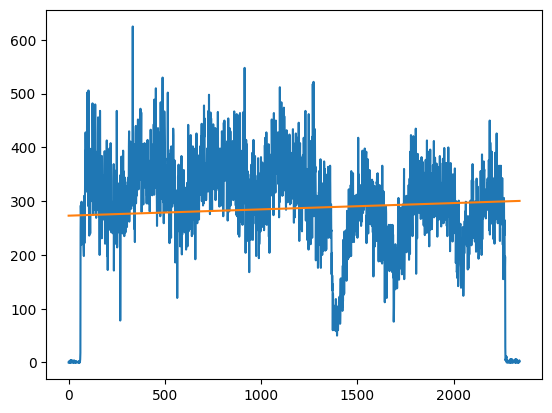

In [98]:
# Using pyplot to cordinate two sets of data 
plt.plot(df_copy['index'], df_copy['RESULTS'])
plt.plot(df_copy['index'], df_copy['Prediction'])
plt.show()